In [2]:
import pandas as pd


df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(df.head())


print(df.columns)

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [4]:

correlations = df.corr()['DEATH_EVENT'].sort_values(ascending=False)
print(correlations)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


predictions = model.predict(X_test)


print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
print("--- Random Forest Results ---")
print(classification_report(y_test, rf_preds))

--- Random Forest Results ---
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


scaled_model = LogisticRegression()
scaled_model.fit(X_train_scaled, y_train)

scaled_preds = scaled_model.predict(X_test_scaled)
print("--- Scaled Logistic Regression Results ---")
print(classification_report(y_test, scaled_preds))

--- Scaled Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



In [12]:
balanced_model = LogisticRegression(class_weight='balanced')
balanced_model.fit(X_train_scaled, y_train)
balanced_preds = balanced_model.predict(X_test_scaled)
print("--- Balanced Logistic Regression Results ---")
print(classification_report(y_test, balanced_preds))

--- Balanced Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



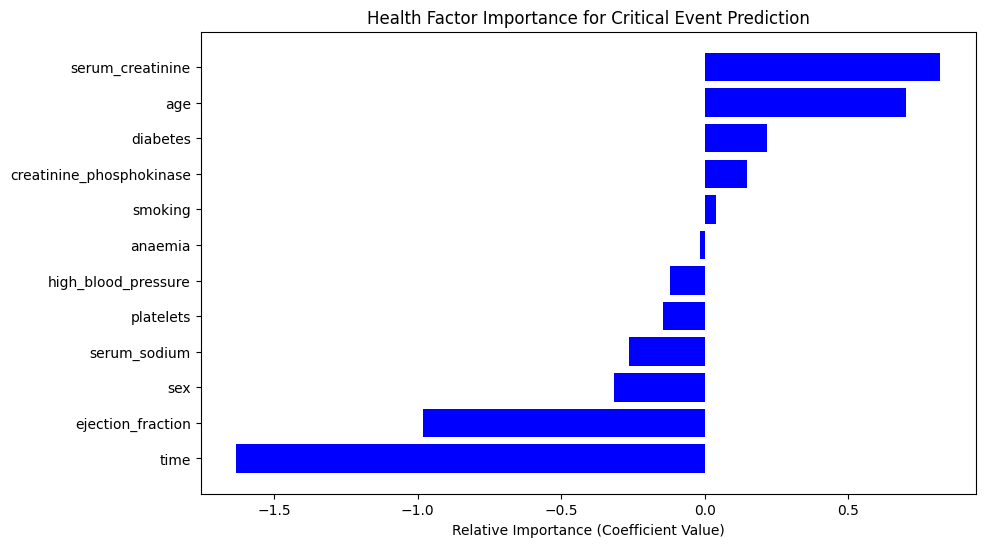

In [14]:
import matplotlib.pyplot as plt
import numpy as np

importances = balanced_model.coef_[0]
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Health Factor Importance for Critical Event Prediction")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance (Coefficient Value)')
plt.show()

In [15]:
results_data = {
    'Model': ['Unscaled Logistic', 'Random Forest', 'Scaled Logistic', 'Balanced Logistic'],
    'Accuracy': [0.78, 0.75, 0.80, 0.80],
    'Recall (Class 1)': [0.60, 0.48, 0.56, 0.64],
    'Precision (Class 1)': [0.83, 0.86, 0.93, 0.84]
}
comparison_df = pd.DataFrame(results_data)
print(comparison_df)

               Model  Accuracy  Recall (Class 1)  Precision (Class 1)
0  Unscaled Logistic      0.78              0.60                 0.83
1      Random Forest      0.75              0.48                 0.86
2    Scaled Logistic      0.80              0.56                 0.93
3  Balanced Logistic      0.80              0.64                 0.84
